In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils.notebook_config import *
import random

Seed!


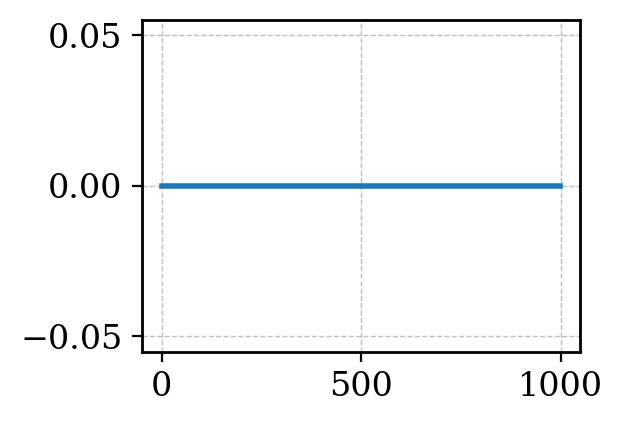

In [47]:
alpha, beta, L = 0.9, 0.9, 30

codons = "AGCGCGCGGUCACAACGUUACUGUUAUCGAUCCGGUCGAAAAACUGCUGGCAGUGGGGCAUUACCUCGAAUCUACCGUCGAUAUUGCUGA"

q = np.random.rand(30)

def protein(alpha, beta, q, L, timesteps: int):
    counter = 0                         #protein counter
    ribo = np.zeros(L)                 #tracks where the ribosomes are, 1 = ribosome, 0 = no ribosome
    production = []                     #amount of protein over time
    index = np.array([i for i in range(30)])        #index of each codon
    time = [i for i in range(timesteps)]       #time over which we plot
    for step in range(timesteps):
        p = np.random.permutation(len(index))       #make sure that the q_i and index stay together after shuffling
        index, q = index[p], q[p]                   #shuffle the codons randomly
        for i in index:
            if i == 0:                  #Special case 1: the beginning
                if random.random() < alpha:
                    if ribo[0] == 0:
                        ribo[0] += 1
                        print("Seed!")
                continue
            if i == 29:                 #Special case 2: the end
                if random.random() < beta:
                    if ribo[29] == 1:
                        ribo[29] -= 1
                        counter += 1
                        print("Farm")
                continue
            if random.random() < q[i]:
                if ribo[i] == 1 and ribo[i+1] == 0:
                    ribo[i+1] += 1
                    ribo[i] -= 1
                    print("MOVE")
        production.append(counter)
    return time, production

x,y = protein(alpha, beta, q, L, 1000)

plt.plot(x,y)

In [24]:
a = np.array([6, 4, 8, 9, 10])
b = np.array([1, 2, 3, 4, 5])

p = np.random.permutation(len(a))  # Generate a shuffledx array
a, b = a[p], b[p]

print(a)  
print(b)

[10  6  8  4  9]
[5 1 3 2 4]
